In [1]:
# Step 1: Install and import necessary libraries
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.api import OLS, add_constant

df = pd.read_csv('tip_dataset.csv')  # Replace 'tip_dataset.csv' with actual filename



# Step 8: Insights for Management
# Based on significant factors, provide recommendations

In [2]:
print(df.head())
print(df.info())
print(df.describe())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      

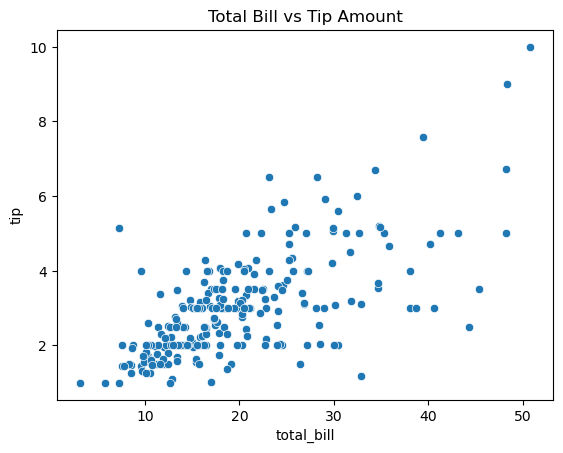

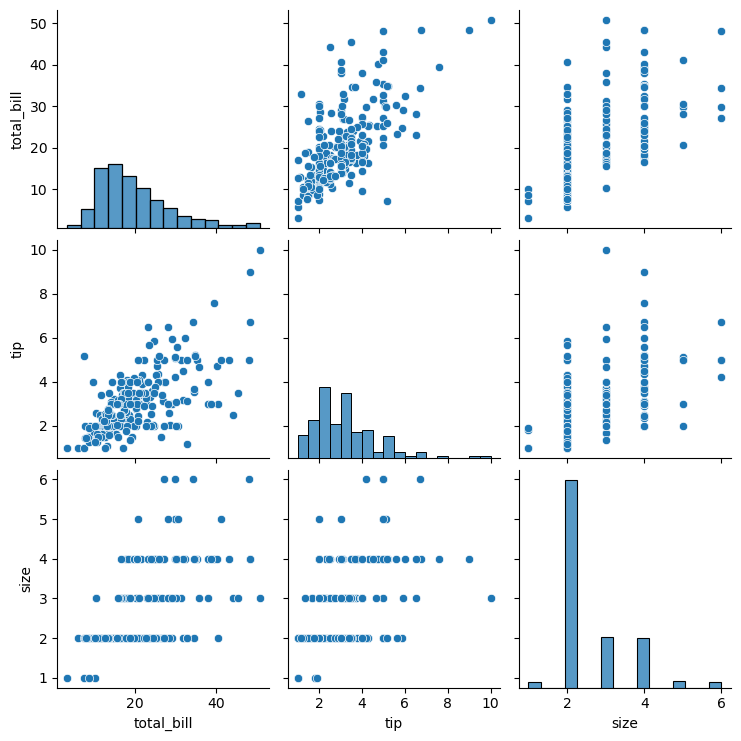

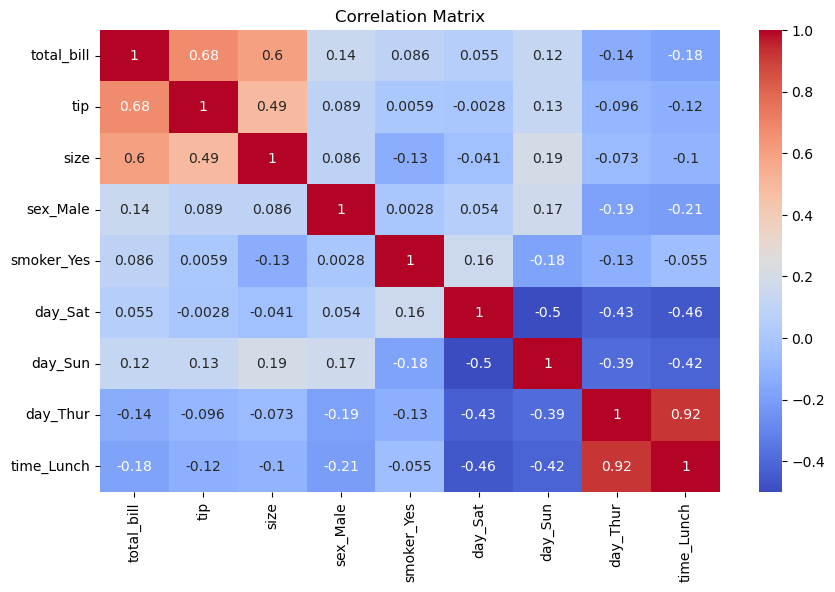

In [3]:
sns.scatterplot(data=df, x="total_bill", y="tip")
plt.title("Total Bill vs Tip Amount")
plt.show()

# Pair plot for multiple features
sns.pairplot(df)
plt.show()
df = pd.get_dummies(df, drop_first=True)
# Correlation matrix (Heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [4]:
df = pd.get_dummies(df, drop_first=True)  # One-hot encode categorical variables

# Define features and target variable
X = df.drop('tip', axis=1)  # Replace with relevant predictors
y = df['tip']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale features for models that are sensitive to feature scales (SVR, KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Define a function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{model.__class__.__name__}:")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")
    print("\n")
    return model

# Instantiate models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regression (SVR)": SVR(),
    "K-Nearest Neighbors (KNN)": KNeighborsRegressor()
}

# Evaluate each model
trained_models = {}
for model_name, model in models.items():
    if model_name in ["Support Vector Regression (SVR)", "K-Nearest Neighbors (KNN)"]:
        # Use scaled data for SVR and KNN
        trained_models[model_name] = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    else:
        trained_models[model_name] = evaluate_model(model, X_train, X_test, y_train, y_test)

LinearRegression:
Mean Absolute Error: 0.7080218832979794
Mean Squared Error: 0.8939195221609524
R^2 Score: 0.5545031052534974


Ridge:
Mean Absolute Error: 0.6774443903542937
Mean Squared Error: 0.8625328620615534
R^2 Score: 0.5701450721913541


Lasso:
Mean Absolute Error: 0.6901871312949667
Mean Squared Error: 0.9049342002795262
R^2 Score: 0.549013791308776


DecisionTreeRegressor:
Mean Absolute Error: 1.083877551020408
Mean Squared Error: 2.2307612244897954
R^2 Score: -0.11173005376223766


RandomForestRegressor:
Mean Absolute Error: 0.7254040816326532
Mean Squared Error: 0.8162891967346937
R^2 Score: 0.5931912288017511


SVR:
Mean Absolute Error: 0.7117901435562465
Mean Squared Error: 0.9147909861360833
R^2 Score: 0.5441015286470744


KNeighborsRegressor:
Mean Absolute Error: 0.7380408163265305
Mean Squared Error: 0.9518195918367346
R^2 Score: 0.5256478217445164




In [15]:
# For linear models like Linear Regression, Ridge, and Lasso
for model_name, model in trained_models.items():
    if model_name in ["Linear Regression", "Ridge", "Lasso"]:
        print(f"Feature Importance for {model_name}:")
        importance = pd.Series(model.coef_, index=X.columns).sort_values(key=abs, ascending=False)
        print(importance)
        print("\n")

# For ensemble models like Random Forest
if "Random Forest" in trained_models:
    model = trained_models["Random Forest"]
    feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
    print("Feature Importance for Random Forest:")
    print(feature_importances)
    print("\n")

Feature Importance for Linear Regression:
day_Thur     -0.554344
time_Lunch    0.451060
day_Sat      -0.262588
size          0.209329
day_Sun      -0.158962
total_bill    0.085614
smoker_Yes   -0.031900
sex_Male     -0.007374
dtype: float64


Feature Importance for Ridge:
day_Thur     -0.287289
day_Sat      -0.240453
time_Lunch    0.208725
size          0.207843
day_Sun      -0.134628
total_bill    0.085409
smoker_Yes   -0.021608
sex_Male     -0.014428
dtype: float64


Feature Importance for Lasso:
total_bill    0.084834
size          0.000000
sex_Male     -0.000000
smoker_Yes   -0.000000
day_Sat      -0.000000
day_Sun       0.000000
day_Thur      0.000000
time_Lunch    0.000000
dtype: float64


Feature Importance for Random Forest:
total_bill    0.751019
smoker_Yes    0.072610
size          0.070669
day_Sat       0.033447
day_Sun       0.026301
sex_Male      0.022588
time_Lunch    0.012956
day_Thur      0.010410
dtype: float64




In [ ]:

insights on dataset

Examine whether there is a difference in tipping behavior between male and female customers. For instance, if one gender tends to tip more or has higher average bills, this could indicate a trend worth noting.

Investigate whether smokers tend to have higher or lower total bills and tips compared to non-smokers. Understanding this relationship could help identify unique customer behaviors or spending patterns.

Investigate whether smokers tend to have higher or lower total bills and tips compared to non-smokers. Understanding this relationship could help identify unique customer behaviors or spending patterns.